In [1]:
!pip install fbprophet
!pip install pyupbit
import pandas as pd
import numpy as np
from fbprophet import Prophet
import pyupbit

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pyupbit.get_ohlcv("KRW-DOGE", interval="minute60")
print(df.tail())

                      open   high    low  close        volume         value
2021-09-04 14:00:00  343.0  343.0  341.0  341.0  2.245880e+07  7.672786e+09
2021-09-04 15:00:00  342.0  344.0  341.0  344.0  2.356291e+07  8.078193e+09
2021-09-04 16:00:00  343.0  346.0  343.0  343.0  3.196803e+07  1.100531e+10
2021-09-04 17:00:00  343.0  345.0  342.0  344.0  2.462005e+07  8.451232e+09
2021-09-04 18:00:00  344.0  346.0  343.0  345.0  2.248998e+07  7.751796e+09


In [3]:
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds', 'y']]
m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
m.fit(data)
future = m.make_future_dataframe(periods=24, freq='H')
forecast = m.predict(future)
forecast.tail()

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
219,2021-09-05 14:00:00,185.453685,324.830723,335.102496,181.844068,189.452144,144.466466,144.466466,144.466466,-0.878621,...,-2.354238,-2.354238,-2.354238,147.699325,147.699325,147.699325,0.0,0.0,0.0,329.920151
220,2021-09-05 15:00:00,184.708053,324.388914,334.726631,180.881878,188.933972,144.897374,144.897374,144.897374,-0.705465,...,-2.651867,-2.651867,-2.651867,148.254706,148.254706,148.254706,0.0,0.0,0.0,329.605427
221,2021-09-05 16:00:00,183.962421,324.420750,335.749839,179.801914,188.484312,145.636796,145.636796,145.636796,-0.244609,...,-2.925789,-2.925789,-2.925789,148.807193,148.807193,148.807193,0.0,0.0,0.0,329.599217
222,2021-09-05 17:00:00,183.216789,324.094928,335.648223,178.800070,188.042381,146.452939,146.452939,146.452939,0.271058,...,-3.174894,-3.174894,-3.174894,149.356775,149.356775,149.356775,0.0,0.0,0.0,329.669728
223,2021-09-05 18:00:00,182.471157,323.690312,335.656040,177.778359,187.628066,147.094280,147.094280,147.094280,0.589249,...,-3.398410,-3.398410,-3.398410,149.903441,149.903441,149.903441,0.0,0.0,0.0,329.565437


In [4]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

,ds,yhat,yhat_lower,yhat_upper
218,2021-09-05 13:00:00,330.643559,325.537687,335.723915
219,2021-09-05 14:00:00,329.920151,324.830723,335.102496
220,2021-09-05 15:00:00,329.605427,324.388914,334.726631
221,2021-09-05 16:00:00,329.599217,324.420750,335.749839
222,2021-09-05 17:00:00,329.669728,324.094928,335.648223
223,2021-09-05 18:00:00,329.565437,323.690312,335.656040


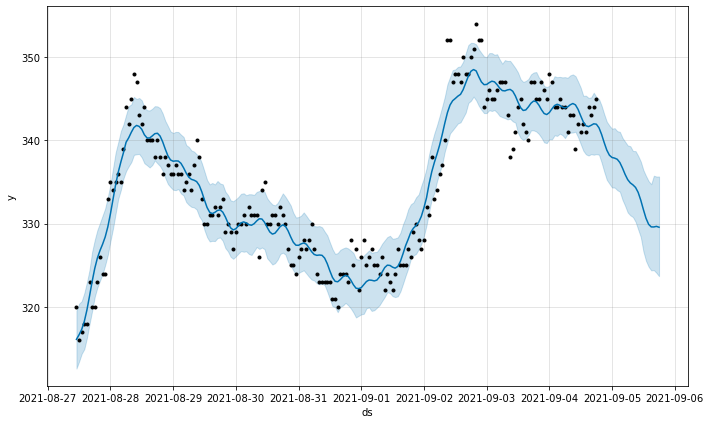

In [5]:
fig1 = m.plot(forecast)

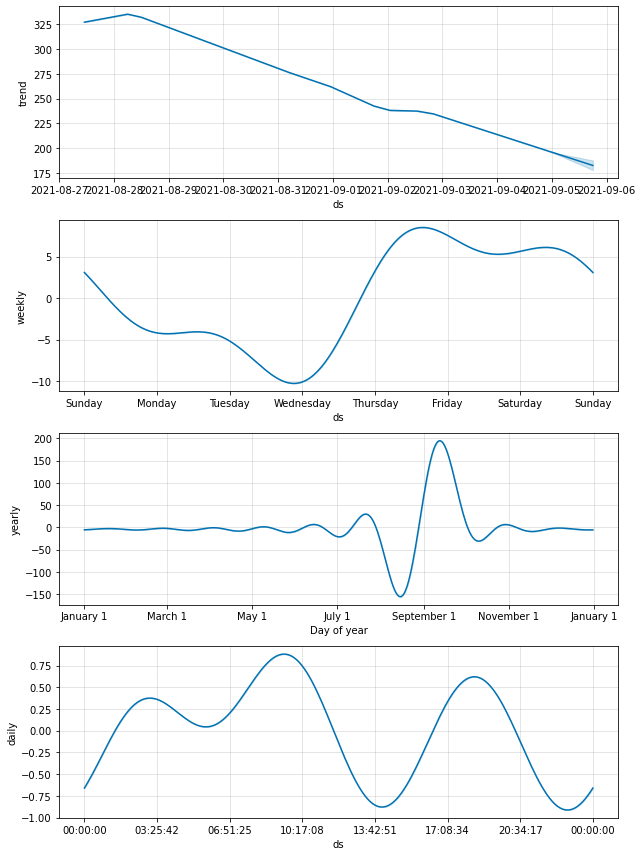

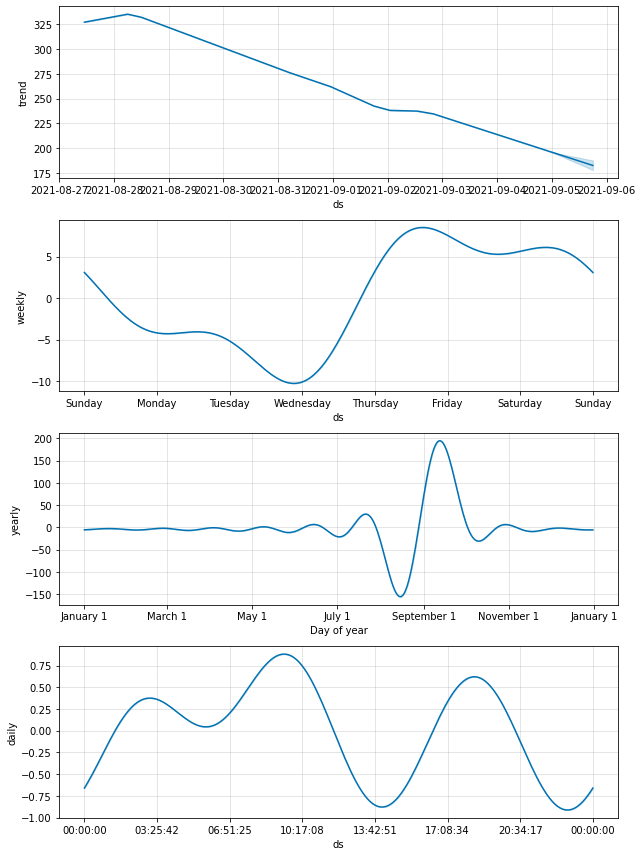

In [6]:
m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


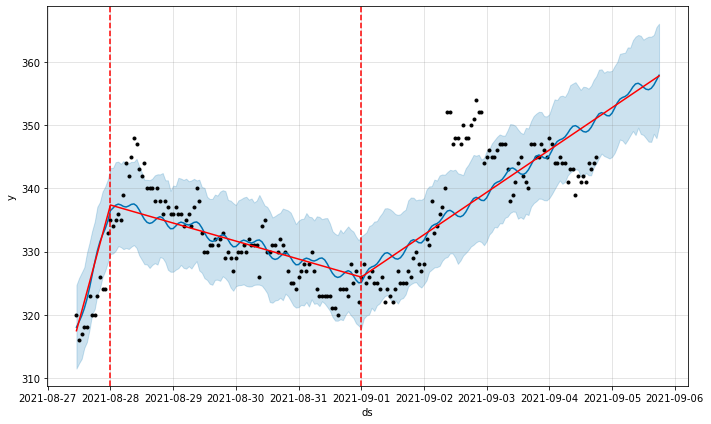

In [7]:
from fbprophet.plot import add_changepoints_to_plot
m = Prophet(changepoint_range=0.9, changepoint_prior_scale=0.05, changepoints=['2021-08-28', '2021-09-01'])
m.fit(data)
future = m.make_future_dataframe(periods=24, freq='H')
forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


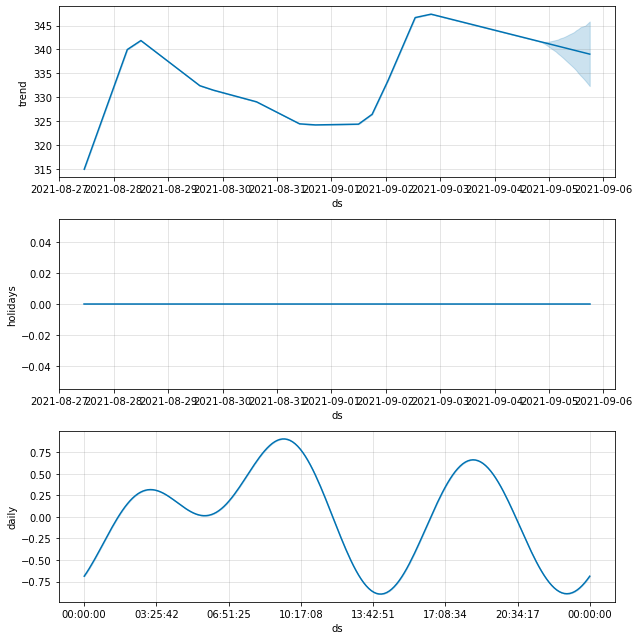

In [8]:
playoffs = pd.DataFrame({
'holiday': 'playoff',
'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                      '2010-01-24', '2010-02-07', '2011-01-08',
                      '2013-01-12', '2014-01-12', '2014-01-19',
                      '2014-02-02', '2015-01-11', '2016-01-17',
                      '2016-01-24', '2016-02-07']),
'lower_window': 0,
'upper_window': 1,
})
superbowls = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
    'lower_window': 0,
    'upper_window': 1,
  })
holidays = pd.concat((playoffs, superbowls))
m = Prophet(holidays=holidays, holidays_prior_scale=0.05)
forecast = m.fit(df).predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]
fig = m.plot_components(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


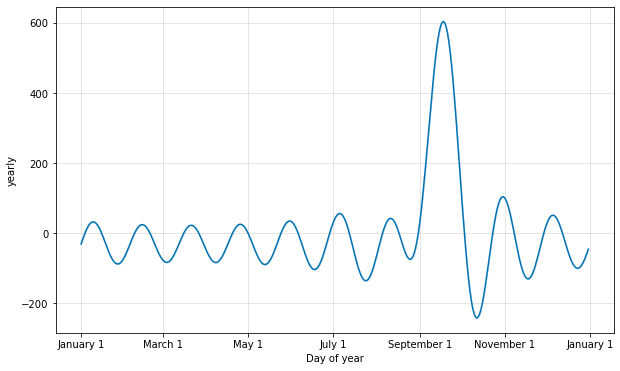

In [9]:
  from fbprophet.plot import plot_yearly
  m = Prophet(yearly_seasonality=10).fit(df)
  a = plot_yearly(m)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


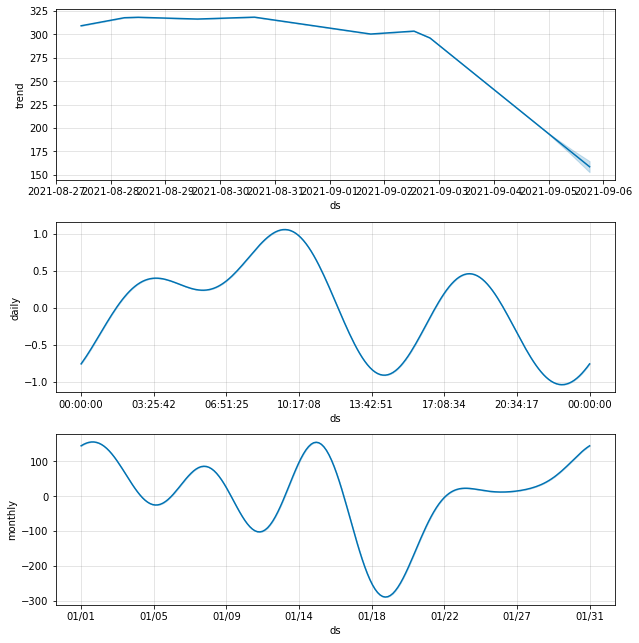

In [10]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


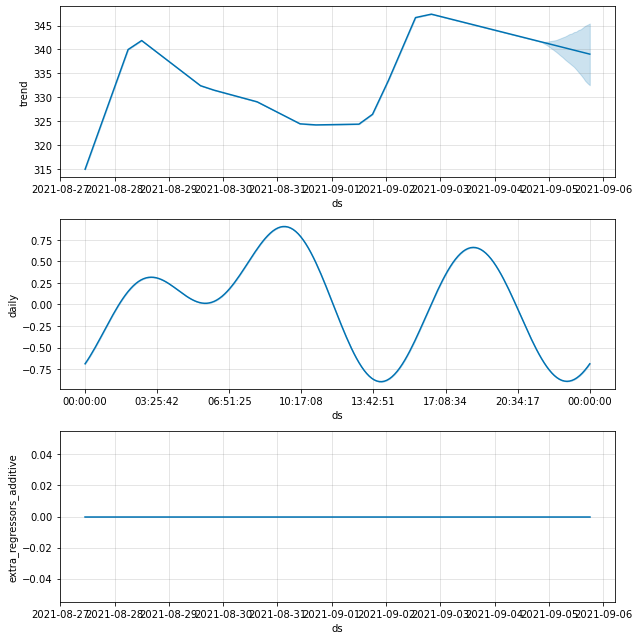

In [11]:
def nfl_sunday(ds):
      date = pd.to_datetime(ds)
      if date.weekday() == 6 and (date.month > 8 or date.month < 2):
          return 1
      else:
          return 0

df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
C:\Users\CKIRUser\anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


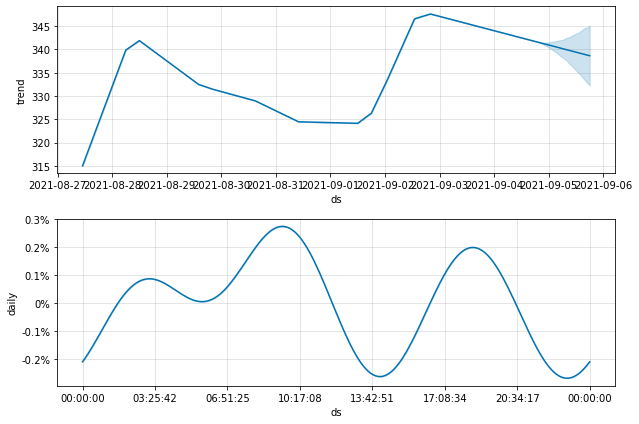

In [12]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(data)
future = m.make_future_dataframe(periods=24, freq='H')
forecast = m.predict(future)
fig = m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
C:\Users\CKIRUser\anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


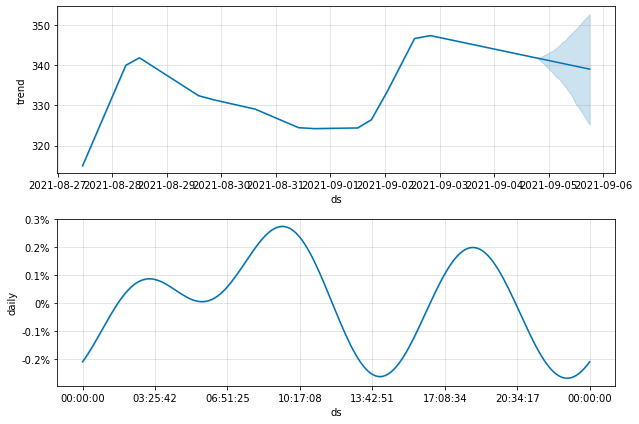

In [13]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)
fig = m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


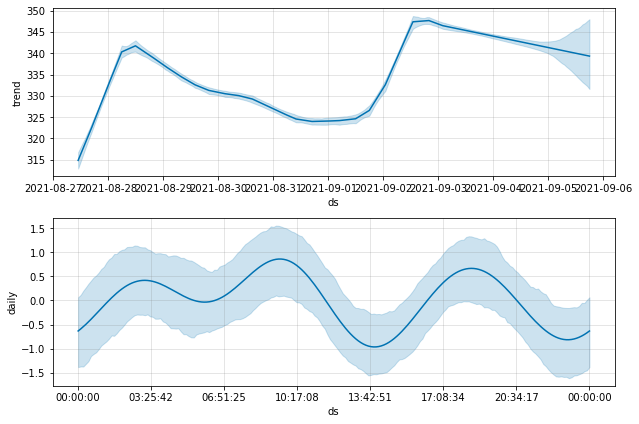

In [14]:
m = Prophet(mcmc_samples=100)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


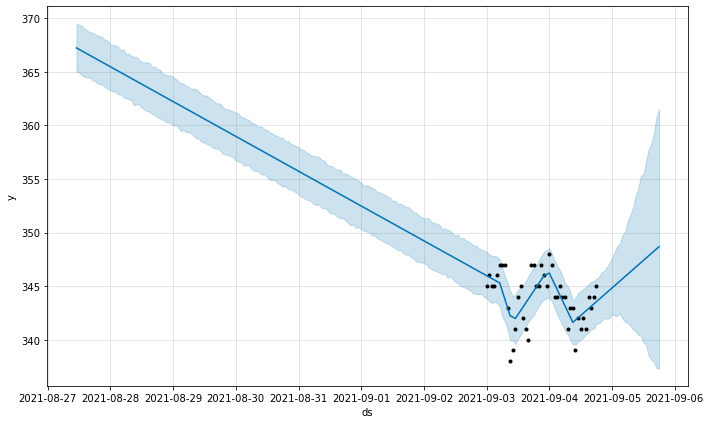

In [16]:
  df.loc[(df['ds'] > '2021-08-27') & (df['ds'] < '2021-09-03'), 'y'] = None
  model = Prophet().fit(df)
  fig = model.plot(model.predict(future))